In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
x,y=make_classification(
    n_samples=1000, 
    n_features=2, 
    n_informative=2,  
    n_redundant=0,    
    n_repeated=0,    
    n_classes=2,
    random_state=45,
    n_clusters_per_class=2
)

In [4]:
x=pd.DataFrame(x)
x.head()

,0,1
0,1.170838,0.780634
1,-1.216037,-0.329699
2,-1.049912,-1.460877
3,-0.090035,-0.486183
4,0.669145,-1.178727


<Axes: xlabel='0', ylabel='1'>

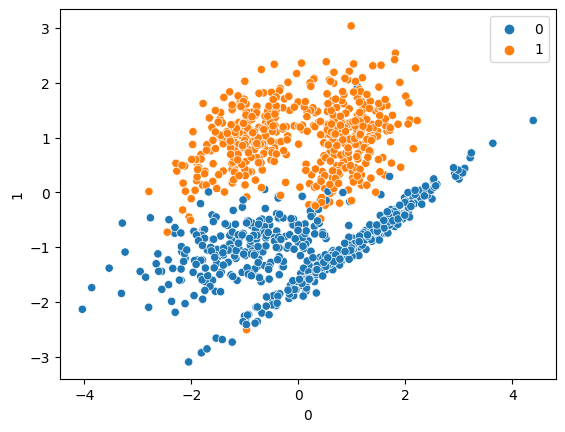

In [5]:
sns.scatterplot(x=x[0],y=x[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

<Axes: xlabel='0', ylabel='1'>

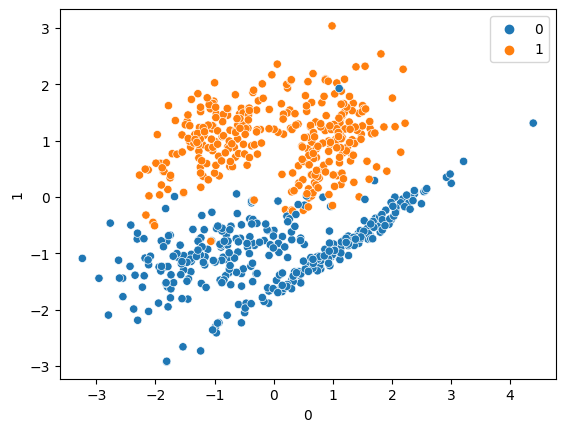

In [10]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=Y_train)

In [12]:
knn=KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],           # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weighting scheme for neighbors
    'p': [1, 2],                            # Distance metric (1: Manhattan, 2: Euclidean)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute neighbors
}

In [13]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=knn,param_grid=param_grid,scoring='accuracy',cv=4)
grid.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [15]:
Y_predict=grid.predict(X_test)

print(accuracy_score(Y_test,Y_predict))

0.9727272727272728
